https://pysal.org/libpysal/notebooks/weights.html

In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.abspath('..'))
import libpysal

/home/naoto/.cache/pypoetry/virtualenvs/pysal-yWLDyC0f-py3.8/lib/python3.8/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [3]:
libpysal.examples.available()

                      Name                                                  Description  Installed
0                    10740  Albuquerque, New Mexico, Census 2000 Tract Data. 10740 i...       True
1                   AirBnB         Airbnb rentals, socioeconomics, and crime in Chicago      False
2                  Atlanta                 Atlanta, GA region homicide counts and rates      False
3                Baltimore                    Baltimore house sales prices and hedonics      False
4                Bostonhsg                         Boston housing and neighborhood data      False
5              Buenosaires                Electoral Data for 1999 Argentinean Elections      False
6              Charleston1   2000 Census Tract Data for Charleston, SC MSA and counties      False
7              Charleston2   1998 and 2001 Zip Code Business Patterns (Census Bureau...      False
8           Chicago Health                             Chicago Health + Socio-Economics      False
9         

In [4]:
libpysal.examples.explain('mexico')

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [6]:
import geopandas
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

from libpysal.weights import Queen, Rook, KNN

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

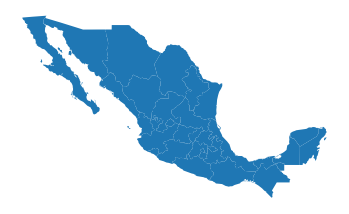

In [10]:
ax = gdf.plot()
ax.set_axis_off()

In [12]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


In [15]:
w_rook = Rook.from_dataframe(gdf)
w_rook.n

32

In [16]:
w_rook.pct_nonzero

12.6953125

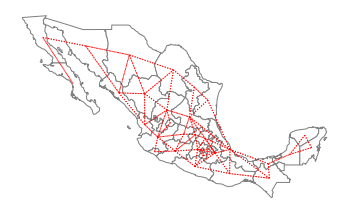

In [17]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()